In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
misc_df = pd.read_csv("./data/misc_stats.csv")
opponent_per_100_df = pd.read_csv("./data/opponent_per_100_poss.csv")
opponent_shooting_df = pd.read_csv("./data/opponent_shooting.csv")
opponent_stats_df = pd.read_csv("./data/opponent_stats.csv")
opponents_per_game_df = pd.read_csv("./data/opponents_per_game.csv")
team_per_game_df = pd.read_csv("./data/team_per_game.csv")
team_shooting_df = pd.read_csv("./data/team_shooting.csv")
team_stats_df = pd.read_csv("./data/team_stats.csv")
standings_df = pd.read_csv("./data/standings.csv")
team_vs_team_df = pd.read_csv("./data/team_vs_team.csv")

In [3]:
standings_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Pre,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar
1,1,Milwaukee Bucks,53-12,28-3,25-9,34-5,19-7,9-2,13-1,12-2,...,46-8,7-4,3-1,36-7,2-2,15-1,13-2,11-2,10-1,2-4
2,2,Los Angeles Lakers,49-14,23-8,26-6,16-7,33-7,5-4,4-2,7-1,...,41-12,8-2,5-3,25-7,3-1,14-1,9-5,10-4,9-2,4-1
3,3,Toronto Raptors,46-18,23-9,23-9,30-10,16-8,8-4,12-3,10-3,...,40-15,6-3,6-4,21-9,4-1,10-3,9-7,12-3,7-3,4-1
4,4,Los Angeles Clippers,44-20,25-7,19-13,17-6,27-14,5-2,4-3,8-1,...,37-18,7-2,8-1,29-8,4-2,10-4,10-5,9-4,7-4,4-1


In [71]:
#cleaning up the data
clean_df = pd.DataFrame()
standings_clean = standings_df[1:]
standings_clean = standings_clean.sort_values(by = ["Unnamed: 1"])
standings_clean = standings_clean.reset_index()
clean_df["Team"] = standings_clean["Unnamed: 1"]
clean_df["Nickname"] = standings_clean["Unnamed: 1"].apply(lambda x: x.split()[-1])
clean_df["Win %"] = standings_clean["Unnamed: 2"].apply(lambda x: x.split("-")[0]).astype(int) / (standings_clean["Unnamed: 2"].apply(lambda x: x.split("-")[0]).astype(int) + standings_clean["Unnamed: 2"].apply(lambda x: x.split("-")[1]).astype(int))
sort_standings = clean_df.sort_values(by = ["Win %"], ascending = False)



Text(0.5, 1.0, 'Winning Percentage of Teams Currently')

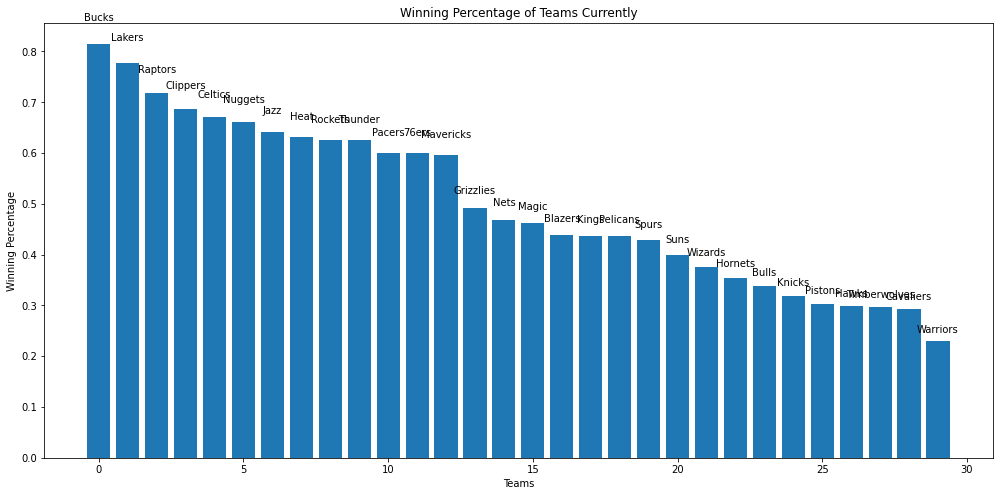

In [66]:
#1st plot - no requiements fulfilled
fig, ax = plt.subplots(figsize = (17,8))
sort_standings = clean_df.sort_values(by = ["Win %"], ascending = False)
sort_standings = sort_standings.reset_index()
x = list(range(30))
# rects1 = ax.bar(x, record.sort_values(ascending = False))
rects1 = ax.bar(x, sort_standings["Win %"])
def autolabel(rects):
    count = 0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                sort_standings["Nickname"][count],
        ha='center', va='bottom')
        count = count + 1
autolabel(rects1)
ax.set_xlabel("Teams")
ax.set_ylabel("Winning Percentage")
ax.set_title("Winning Percentage of Teams Currently")

In [ ]:
#cleaning
team_per_game_clean = team_per_game_df[:30]
team_per_game_clean = team_per_game_clean.sort_values(by = ["Team"])
team_per_game_clean = team_per_game_clean.reset_index()
opponents_per_game_clean = opponents_per_game_df[:30]
opponents_per_game_clean = opponents_per_game_clean.sort_values(by = ["Team"])
opponents_per_game_clean = opponents_per_game_clean.reset_index()
clean_df["Margin"] = team_per_game_clean["PTS"] - opponents_per_game_clean["PTS"]

Text(0.5, 1.0, 'Comparing Average Margin of Victory vs Winning Percentage')

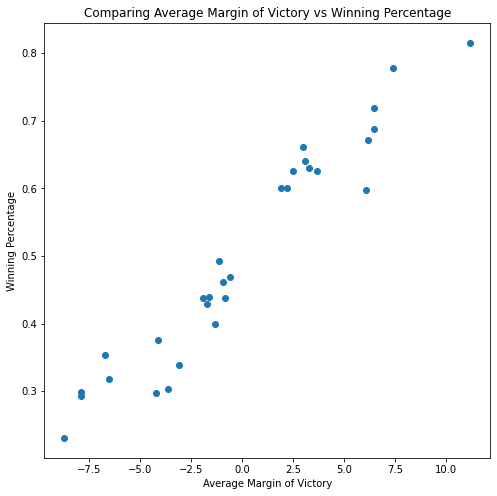

In [70]:
#2nd plot fufills the 3rd requirement
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(clean_df["Margin"], clean_df["Win %"])
ax.set_xlabel("Average Margin of Victory")
ax.set_ylabel("Winning Percentage")
ax.set_title("Comparing Average Margin of Victory vs Winning Percentage")
